# The Representative Consumer

This notebook illustrates how to code a portion of the One-Period Macroeconomic Model in Python. In this notebook, I specifically demonstrate how to model the representative consumer's utility function. The model is based from *Macroeconomics, Fifth Edition* by Williamson (2014). 

[Quant Econ](https://quantecon.org/) and [NumEconCopenhagen](https://numeconcopenhagen.netlify.app/lectures/Optimize_print_and_plot) are useful resources that informed me in writing this notebook. 

## Table of Contents
- [The Representative Consumer's Utility Function](#Utility-Function)
- [The Representative Consumer's Indifference Curve](#IC)
- [The Representative Consumer's Budget Constraint: Case I](#BC-Pi-less-T)
- [The optimal solution under Case I](#Opt-Sol-Case-I)
- [The Representative Consumer's Budget Constraint: Case II](#BC-Pi-greater-than-T)
- [The optimal solution under Case II](#Opt-Sol-Case-II)

## The Representative Consumer's Utility Function <a name="Utility-Function"></a>

As outlined by Williamson (2014), three assumptions define the properties of the representative consumer's utility function:
- (1) More is always preferred to less 
- (2) The consumer likes diversity in his or her consumption bundle.
- (3) Consumption and leisure are normal goods.

The representative consumer's utility function is defined as $U(C,L)$ where $C$ is consumption and $l$ is leisure. $U$ is strictly increasing in both $C$ and $l$, strictly quasi-concave, and twice differentiable. In this note, I define the consumer's utility function as Cobb-Douglas: 

$$U(C, l) = l^{\alpha}C^{1-\alpha}$$

Subject to: 

$$C = wN^{s} + \pi - T$$

Where real total consumption equals real disposable income, $C\geq0$, $w>0$, $\pi>0$, $T>0$, and $0\leq l\leq h$. The consumer receives his income from various sources. $N^{s}$ is time spent working and is defined as the difference between leisure, $l$ and the assumed amount of hours available, $h$. 

The consumer receives income by selling his/her time in the labour market which is paid at a price, $w$ which is the real wage rate. While I do not discuss firms yet, the consumer owns the firms and receives profits in the form of dividend income, $\pi$. and $T$ is a lump-sum tax that the consumer pays to the government. 

$$C = w(h-l) + \pi - T$$

$N^{s}$ is substituted in the constraint by $(h-l)$.

$$C = -wl + wh + \pi - T$$

To begin plotting the utility function and the budget constraint, it is important to import the necessary libraries. Three libraries are used in this note: `numpy`, `matplotlib`, and `scipy`. In the section of code below, i imported the relevant Python libraries and plotted the Utility, $U$, against Consumption, $C$, for a given value of leisure, $l=5$.

Text(0, 0.5, 'Utility, $U(l=5,C)$')

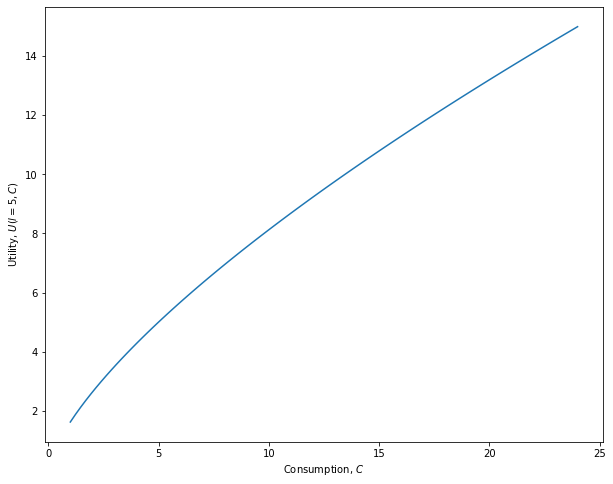

In [40]:
"""
Import relevant libraries
"""
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import minimize_scalar 
"""
The Cobb-Douglas Utility Function
"""
# Set paramters
H = 24 # A fixed value; let's assume 24 hours in a period.
def U(L, C, alpha=0.3): # function for Cobb-Douglas utility function;
    return L**alpha * C**(1-alpha) # return Utility

# plot Utility function given a constant value of leisure
fig, ax = plt.subplots(figsize=(10, 8))
l_ = 5 # set a fixed value of leisure at 5;
C = np.linspace(1, L, 100) # set NumPy array for Consumption;
ax.plot(C, U(l_, C))
ax.set_xlabel("Consumption, $C$")
ax.set_ylabel("Utility, $U(l=5,C)$")

In the following section of code below, I created a contour plot of the utility function. I created a NumPy array for leisure, defined the contours and then set the necessary parameters for graphing the contours.

Text(0.5, 1.0, '$U(l,C)$')

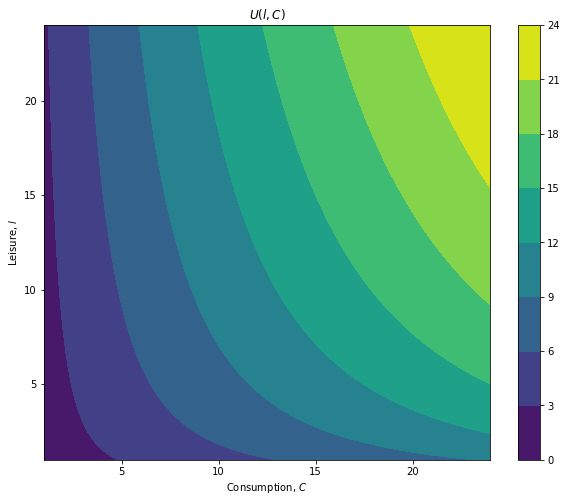

In [23]:
# Contour plot of Utility function
fig, ax = plt.subplots(figsize=(10, 8))
l = np.linspace(1, H, 100).reshape((100, 1)) # set NumPy array for leisure;
contours = ax.contourf(C, l.flatten(), U(l, C)) # set contours
fig.colorbar(contours) # set colour bar for contours
ax.set_xlabel("Consumption, $C$") # set xlabel
ax.set_ylabel("Leisure, $l$") # set ylabel
ax.set_title("$U(l,C)$") # set title

## The Representative Consumer's Indifference Curve <a name="IC"></a>

To graphically represent the representative consumer's preferences, an indifference map is used. An indifference map is a combination of indifference curves. Before plotting the representative consumer's indifference curve (IC), it is important to highlight an IC's two key properties:
- (1) An IC is downward sloping
- (2) An IC is convex (bowed towards the origin)

How do we find the relevant bundles with which the representative consumer would be indifferent? This can be done by fixing utility, $\bar{U}$. Then we can implement this calculation by defining *C* as the dependent variable as shown in the equation below:

$$C(\bar{U}, l) = \bar{U}^\frac{1}{1-\alpha}l^\frac{-\alpha}{1-\alpha}$$

In the section of code below, I plotted the representative consumer's IC given various levels of utility.

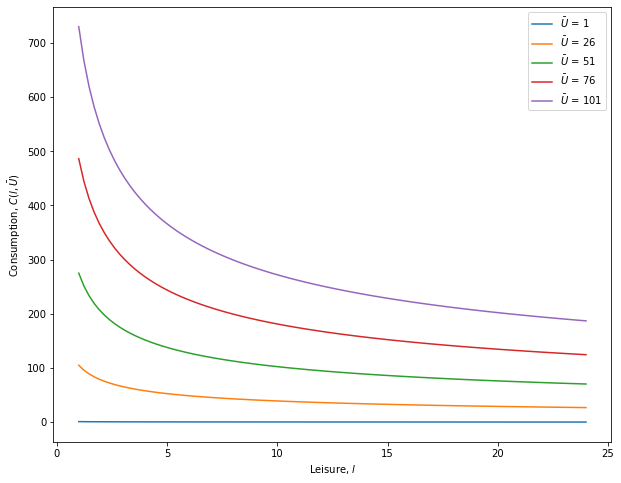

In [24]:
# function for indifference curve
def C_indifference(L, ubar, alpha): # we define leisure as the x-axis;
    return ubar**(1/(1-alpha)) * L**(-alpha/(1-alpha)) # return values;
# function for plotting different levels of indifference curves
def plot_indifference_curves(ax, alpha=0.3): # function for plotting indifference curves at different levels of Ubar
    ubar = np.arange(1, 125, 25)
    ax.plot(C, C_indifference(l, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar]) # set legend with a for-loop.
    ax.set_xlabel("Leisure, $l$")
    ax.set_ylabel(r"Consumption, $C(l, \bar{U}$)")

fig, ax = plt.subplots(figsize=(10, 8))
plot_indifference_curves(ax)

## The Representative Consumer's Budget Constraint: Case I <a name="BC-Pi-less-T"></a>

There are two cases that arise with the representative consumer's budget constraint. We explore the first case, when $T>\pi$, $\pi - T<0$. This means that the difference between dividend income and the lump-sum tax is negative. 

The shaded blue area outlines the feasible set of consumption and leisure bundles that the representative consumer could purchase. The indifference map from the prior section can be added on the budget constraint as shown in the code below.

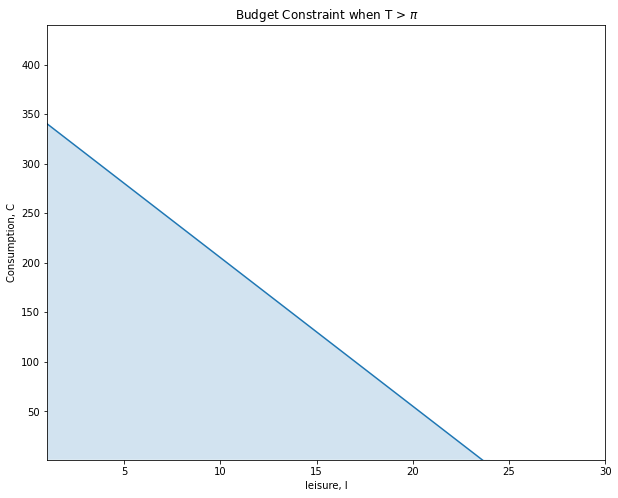

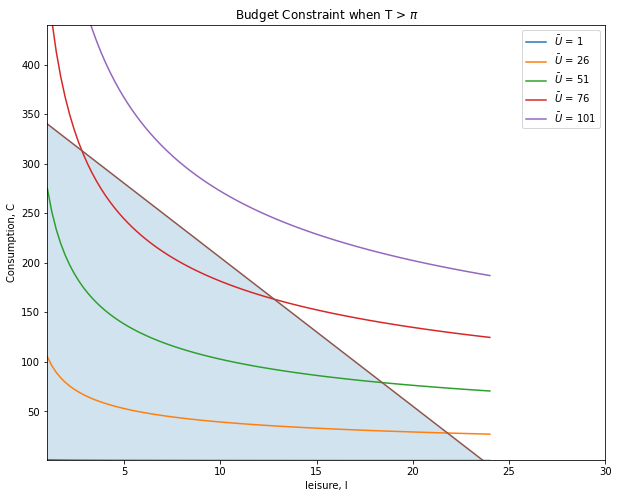

In [35]:
"""
Case I: Budget Constraint when T > Pi
"""
# Set paramters
H = 24 # A fixed value; let's assume 24 hours in a period;
w = 15 # wage rate
pi = 45 # dividend income
T = 50 # lump-sum tax
l =  np.linspace(1, H, 100).reshape((100, 1)) # set NumPy array for leisure;

def C_bc(H, l, w, pi, T): 
    return  (-w*l) + (w*H) + (pi - T)

def plot_budget_constraint(ax, l, H, w, pi, T):
    C = C_bc(H, l, w, pi, T)
    c_max = np.max(C) # find max value of the consumption budget constraint
    v = [1, 30, 1, c_max+100] # Set the axes range;
    ax.set(title="Budget Constraint when T > $\pi$", xlabel=r'leisure, l', ylabel=r'Consumption, C')
    l = np.array(l.flatten(), dtype=float)
    C = np.array(C.flatten(), dtype=float)
    ax.plot(l, C)
    ax.fill_between(l, 1, C, alpha=0.2) # indicate the feasible set of bundles by filling the area below the budget constraint.
    plt.axis(v)

fig, ax = plt.subplots(figsize=(10, 8))
plot_budget_constraint(ax, l, H, w, pi, T)

# plot ICs and Budget Constraint - version 1
fig, ax = plt.subplots(figsize=(10, 8))
plot_indifference_curves(ax)
plot_budget_constraint(ax, l, H, w, pi, T)

## The optimal solution under Case I <a name="Opt-Sol-Case-I"></a>

Finding a solution for the particular value of consumption, $C$ and leisure, $l$, that maximizes utility can be done by solving the representative consumer's maximization problem:

$$\max_{C,l} U(C, L) = l^{\alpha}C^{1-\alpha}$$
$$subject\;to$$
$$C = -wl + wh + \pi - T$$

To solve this problem, [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize) offers several options to solve this multi-dimensional maximization problem. Since the representative consumer's budget constraint is binding, which means the budget constraint holds at $C = -wl + wh + \pi - T$ (assuming no inequality constraints), we can convert the original problem into a single-variable optimization problem by substituting the budget constraint into the utility function. This means that $C(l) = -wl + wh + \pi - T$.

$$\max_{l} l^{\alpha}(-wl + wh + \pi - T)^{1-\alpha}$$

$$\max_{l} l^{\alpha}C(l)^{1-\alpha}$$

To solve this modified optimization problem, I used `scipy.optimize.minimize_scalar` which finds the optimal value of $x$ that minimizes $f(x)$. The code below implements how to find and plot the optimal solution.

Text(7.312999971435773, 255.95500042846342, '$u^{max} = 85.53$')

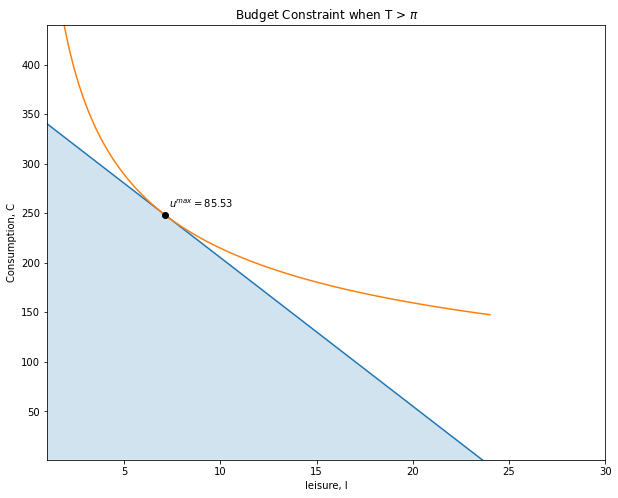

In [36]:
def objective(l, H = 24, w = 15, pi = 45, T = 50): # define the objective function needed to be solved
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

# minimize the objective function.
result = minimize_scalar(objective) # minimize the objective function
optimal_l = result.x # retrieve optimal leisure
optimal_C = C_bc(H, optimal_l, w, pi, T) # derive optimal Consumption
optimal_U = U(optimal_l, optimal_C) # calculate optimal utility

# plot the optimal solution with the budget constraint
fig, ax = plt.subplots(figsize=(10, 8))
plot_budget_constraint(ax, l, H, w, pi, T)
ax.plot(l, C_indifference(l, optimal_U, alpha=0.3))
ax.plot(optimal_l, optimal_C,'ro',color='black') # a black dot
ax.text(optimal_l*1.03,optimal_C*1.03,f'$u^{{max}} = {np.round(optimal_U,2)}$') # multiply by 1.03 to give space;

## The Representative Consumer's Budget Constraint: Case II <a name="BC-Pi-greater-than-T"></a>

There are two cases that arise with the representative consumer's budget constraint. We explore the first case, when $T<\pi$, $\pi - T>0$. This means that the difference between dividend income and the lump-sum tax is negative. Similar to the first case, the shaded area is the feasible set of $C$ and $l$ that the representative consumer could purchase. The budget constraint under Case II is kinked since the consumer cannot consume more than $h$ hours of leisure.

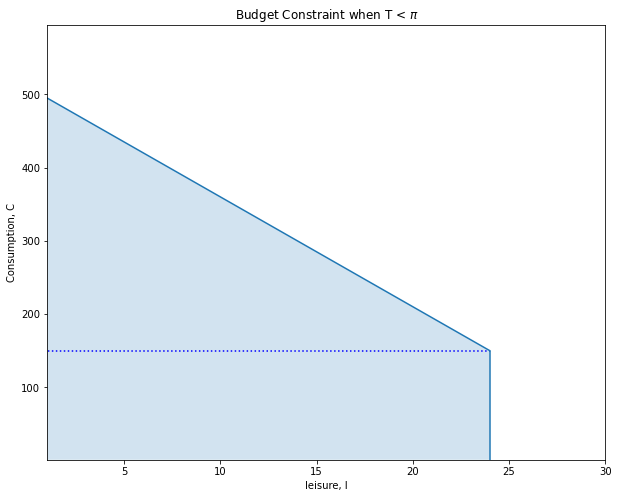

In [38]:
"""
Case II: Budget Constraint when T < Pi
"""
# Re-set parameters
H = 24 # A fixed value; let's assume 24 hours in a period.
w = 15 # wage rate
pi = 200 # dividend income
T = 50 # lump-sum tax
l =  np.linspace(1, H, 100).reshape((100, 1)) # set NumPy array for leisure;

C_ = C_bc(H,l,w,pi,T) # consumption budget constraint when Pi > T;

def plot_budget_constraint_(ax, l, H, w, pi, T): # function for plotting budget constraint when Pi > T
    C_ = C_bc(H, l, w, pi, T)
    c_max = np.max(C_) # find max value of the consumption budget constraint
    v = [1, 30, 1, c_max+100] # Set the axes range;
    ax.set(title="Budget Constraint when T < $\pi$", xlabel=r'leisure, l', ylabel=r'Consumption, C')
    # ax.plot(l, C_)
    l = np.array(l.flatten(), dtype=float)
    C_ = np.array(C_.flatten(), dtype=float)
    ax.plot(l, C_)
    ax.fill_between(l, 1, C_, alpha=0.2)
    # horizontal line indicating Pi-T
    plt.hlines(y=min(C_), xmin=0, xmax=H, color='blue', linestyles='dotted')
    # vertical line in the budget constraint
    plt.vlines(x=H,ymin=0,ymax=min(C_))
    plt.axis(v)
    
fig, ax = plt.subplots(figsize=(10, 8))
plot_budget_constraint_(ax, l, H, w, pi, T)

## The optimal solution under Case II <a name="Opt-Sol-Case-II"></a>

A similar code as shown below is implemented in finding the optimal solution under Case II. 

Text(10.505999845875925, 367.71000231186116, '$u^{max} = 122.87$')

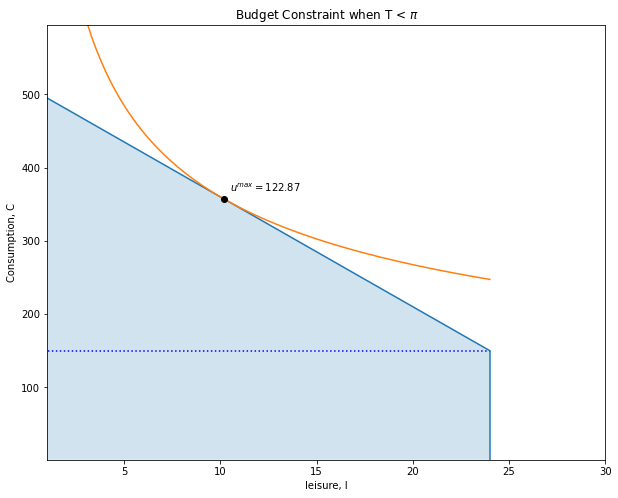

In [39]:
def objective_(l, H = 24, w = 15, pi = 200, T = 50):
    """
    Return value of -U for a given leisure, at a possible level of consumption.
    """
    C = C_bc(H, l, w, pi, T)
    return -U(l, C)

result_ = minimize_scalar(objective_)
optimal_l_ = result_.x # get optimal leisure
optimal_C_ = C_bc(H, optimal_l_, w, pi, T) # derive optimal Consumption
optimal_U_ = U(optimal_l_, optimal_C_) # solve for optimal Utility

fig, ax = plt.subplots(figsize=(10, 8))
plot_budget_constraint_(ax, l, H, w, pi, T)
ax.plot(l, C_indifference(l, optimal_U_, alpha=0.3))
ax.plot(optimal_l_, optimal_C_,'ro',color='black') # a black dot
ax.text(optimal_l_*1.03,optimal_C_*1.03,f'$u^{{max}} = {np.round(optimal_U_,2)}$') # multiply by 1.03 to give space;